# Fixed-Point Representation with User Input

In [7]:
SCALE_FACTOR = 1000  # This determines the precision, e.g., 1000 for three decimal places

# Conversion functions
def to_fixed(number):
    return int(number * SCALE_FACTOR)

def from_fixed(fixed_number):
    return fixed_number / SCALE_FACTOR

# Operations
def add_fixed(a, b):
    return a + b

def subtract_fixed(a, b):
    return a - b

def multiply_fixed(a, b):
    return (a * b) // SCALE_FACTOR

def divide_fixed(a, b):
    return (a * SCALE_FACTOR) // b if b != 0 else "Error: Division by zero"

# User Input Function
def fixed_point_calculator():
    print("Fixed-Point Arithmetic Calculator")
    num1 = float(input("Enter the first number: "))
    num2 = float(input("Enter the second number: "))
    
    fixed_num1 = to_fixed(num1)
    fixed_num2 = to_fixed(num2)
    
    print("Choose an operation:")
    print("1. Addition")
    print("2. Subtraction")
    print("3. Multiplication")
    print("4. Division")
    choice = input("Enter the number of the operation: ")
    
    if choice == '1':
        result = add_fixed(fixed_num1, fixed_num2)
    elif choice == '2':
        result = subtract_fixed(fixed_num1, fixed_num2)
    elif choice == '3':
        result = multiply_fixed(fixed_num1, fixed_num2)
    elif choice == '4':
        result = divide_fixed(fixed_num1, fixed_num2)
    else:
        print("Invalid choice")
        return
    
    print("Result in fixed-point:", result)
    print("Result converted back to floating-point:", from_fixed(result))

# Run the fixed-point calculator
fixed_point_calculator()



Fixed-Point Arithmetic Calculator


Enter the first number:  1.0009
Enter the second number:  1.0009


Choose an operation:
1. Addition
2. Subtraction
3. Multiplication
4. Division


Enter the number of the operation:  1


Result in fixed-point: 2000
Result converted back to floating-point: 2.0


In [ ]:
# Run the fixed-point calculator
fixed_point_calculator()

# Floating-Point Representation with User Input

In [5]:
# Floating-point calculator using Python's built-in float type
def add_floating(a, b):
    return a + b

def subtract_floating(a, b):
    return a - b

def multiply_floating(a, b):
    return a * b

def divide_floating(a, b):
    return a / b if b != 0 else "Error: Division by zero"

# User Input Function
def floating_point_calculator():
    print("Floating-Point Arithmetic Calculator")
    num1 = float(input("Enter the first number: "))
    num2 = float(input("Enter the second number: "))
    
    print("Choose an operation:")
    print("1. Addition")
    print("2. Subtraction")
    print("3. Multiplication")
    print("4. Division")
    choice = input("Enter the number of the operation: ")
    
    if choice == '1':
        result = add_floating(num1, num2)
    elif choice == '2':
        result = subtract_floating(num1, num2)
    elif choice == '3':
        result = multiply_floating(num1, num2)
    elif choice == '4':
        result = divide_floating(num1, num2)
    else:
        print("Invalid choice")
        return
    
    print("Result in floating-point:", result)

# Run the floating-point calculator
floating_point_calculator()


Floating-Point Arithmetic Calculator


Enter the first number:  5.5834
Enter the second number:  10000000000


Choose an operation:
1. Addition
2. Subtraction
3. Multiplication
4. Division


Enter the number of the operation:  3


Result in floating-point: 55834000000.0


In [ ]:
# Run the floating-point calculator
floating_point_calculator()

# The full conversion of the integer part to binary and display each step.

In [39]:
import pandas as pd

def parse_scientific_notation(input_str):
    """
    Parses a string in scientific notation (e.g., '5.5834*10^10' or '5.5834e10')
    and converts it to an integer by handling large exponents directly.
    """
    # Replace `*10^` with `e` to ensure compatibility with float conversion
    if '*10^' in input_str:
        input_str = input_str.replace('*10^', 'e')
    elif '10^' in input_str:
        input_str = input_str.replace('10^', 'e')
    # Convert to float first, then to integer
    return int(float(input_str))

def decimal_to_binary_steps(decimal_number):
    """
    Converts a decimal number to binary, showing each step of the
    conversion for both the integer and fractional parts.
    """
    # Separate integer and fractional parts
    integer_part = int(decimal_number)
    fractional_part = decimal_number - integer_part

    # Step-by-step conversion for the integer part
    int_steps = []
    current_value = integer_part
    while current_value > 0:
        remainder = current_value % 2
        quotient = current_value // 2
        int_steps.append((current_value, quotient, remainder))
        current_value = quotient

    # Reverse the list to get the binary digits in correct order
    int_steps.reverse()
    integer_binary = ''.join(str(remainder) for _, _, remainder in int_steps)

    # Step-by-step conversion for the fractional part
    frac_steps = []
    fractional_binary = ""
    count = 0  # Limit the fractional binary to avoid infinite loops with non-terminating fractions
    while fractional_part > 0 and count < 23:  # IEEE 754 single-precision has 23 bits for the fraction
        fractional_part *= 2
        bit = int(fractional_part)
        fractional_binary += str(bit)
        fractional_part -= bit
        frac_steps.append((fractional_part, bit))
        count += 1

    # Create DataFrames for integer and fractional parts
    df_int_steps = pd.DataFrame(int_steps, columns=["Decimal Value", "Quotient", "Remainder"])
    df_frac_steps = pd.DataFrame(frac_steps, columns=["Fractional Part", "Bit"])

    # Combine integer and fractional binary parts
    full_binary_representation = integer_binary + "." + fractional_binary if fractional_binary else integer_binary
    
    return df_int_steps, df_frac_steps, full_binary_representation

# Get user input in scientific notation format
input_str = input("Enter a decimal number in scientific notation (e.g., 5.5834*10^10): ")

# Parse the input string and convert it to a large integer without overflow
decimal_number = parse_scientific_notation(input_str)

# Run the function to get the conversion steps and binary result
df_int_steps, df_frac_steps, full_binary_representation = decimal_to_binary_steps(decimal_number)

# Display the DataFrame of steps for integer part
print("\nInteger Conversion Steps:")
print(df_int_steps)

# Display the DataFrame of steps for fractional part if applicable
if not df_frac_steps.empty:
    print("\nFractional Conversion Steps:")
    print(df_frac_steps)

# Display the final binary result for both integer and fractional parts
print(f"\nBinary representation of {decimal_number} is: {full_binary_representation}")


Enter a decimal number in scientific notation (e.g., 5.5834*10^10):  11.8



Integer Conversion Steps:
   Decimal Value  Quotient  Remainder
0              1         0          1
1              2         1          0
2              5         2          1
3             11         5          1

Binary representation of 11 is: 1011


# More general 

In [38]:
import pandas as pd
import re

def parse_general_notation(input_str):
    """
    Parses a string in general decimal notation (e.g., '0.02832', '2.832*10^-2', '2.832e-2')
    and converts it to a float for binary conversion.
    """
    # Replace variations like `*10^` with `e` to normalize scientific notation
    input_str = input_str.replace('*10^', 'e').replace('10^', 'e')
    
    # Convert to float
    return float(input_str)

def decimal_to_binary_steps(decimal_number):
    """
    Converts a decimal number to binary, showing each step of the
    conversion for both the integer and fractional parts.
    """
    # Separate integer and fractional parts
    integer_part = int(decimal_number)
    fractional_part = decimal_number - integer_part

    # Step-by-step conversion for the integer part
    int_steps = []
    current_value = integer_part
    while current_value > 0:
        remainder = current_value % 2
        quotient = current_value // 2
        int_steps.append((current_value, quotient, remainder))
        current_value = quotient

    # Reverse the list to get the binary digits in correct order
    int_steps.reverse()
    integer_binary = ''.join(str(remainder) for _, _, remainder in int_steps) or "0"

    # Step-by-step conversion for the fractional part
    frac_steps = []
    fractional_binary = ""
    count = 0  # Limit the fractional binary to avoid infinite loops with non-terminating fractions
    while fractional_part > 0 and count < 23:  # IEEE 754 single-precision has 23 bits for the fraction
        fractional_part *= 2
        bit = int(fractional_part)
        fractional_binary += str(bit)
        fractional_part -= bit
        frac_steps.append((fractional_part, bit))
        count += 1

    # Create DataFrames for integer and fractional parts
    df_int_steps = pd.DataFrame(int_steps, columns=["Decimal Value", "Quotient", "Remainder"]) if int_steps else pd.DataFrame(columns=["Decimal Value", "Quotient", "Remainder"])
    df_frac_steps = pd.DataFrame(frac_steps, columns=["Fractional Part", "Bit"]) if frac_steps else pd.DataFrame(columns=["Fractional Part", "Bit"])

    # Combine integer and fractional binary parts
    full_binary_representation = integer_binary + "." + fractional_binary if fractional_binary else integer_binary
    
    return df_int_steps, df_frac_steps, full_binary_representation

# Get user input in general notation format
input_str = input("Enter a decimal number (e.g., 0.02832, 2.832*10^-2, or 2.832e-2): ")

# Parse the input string and convert it to a float for binary conversion
try:
    decimal_number = parse_general_notation(input_str)
except ValueError:
    print("Invalid input format. Please enter a valid decimal number.")
else:
    # Run the function to get the conversion steps and binary result
    df_int_steps, df_frac_steps, full_binary_representation = decimal_to_binary_steps(decimal_number)

    # Display the DataFrame of steps for integer part
    print("\nInteger Conversion Steps:")
    print(df_int_steps)

    # Display the DataFrame of steps for fractional part if applicable
    if not df_frac_steps.empty:
        print("\nFractional Conversion Steps:")
        print(df_frac_steps)

    # Display the final binary result for both integer and fractional parts
    print(f"\nBinary representation of {decimal_number} is: {full_binary_representation}")


Enter a decimal number (e.g., 0.02832, 2.832*10^-2, or 2.832e-2):  11.8



Integer Conversion Steps:
   Decimal Value  Quotient  Remainder
0              1         0          1
1              2         1          0
2              5         2          1
3             11         5          1

Fractional Conversion Steps:
    Fractional Part  Bit
0               0.6    1
1               0.2    1
2               0.4    0
3               0.8    0
4               0.6    1
5               0.2    1
6               0.4    0
7               0.8    0
8               0.6    1
9               0.2    1
10              0.4    0
11              0.8    0
12              0.6    1
13              0.2    1
14              0.4    0
15              0.8    0
16              0.6    1
17              0.2    1
18              0.4    0
19              0.8    0
20              0.6    1
21              0.2    1
22              0.4    0

Binary representation of 11.8 is: 1011.11001100110011001100110


# From Binary to Floating point binary form

In [35]:
def binary_to_scientific_form():
    # Prompt the user to enter a binary string
    binary_str = input("Enter a binary number (e.g., 110111.101): ").strip()

    # Split the binary string into integer and fractional parts
    if '.' in binary_str:
        integer_part, fractional_part = binary_str.split('.')
    else:
        integer_part, fractional_part = binary_str, ''

    # Normalize the binary to start with "1."
    if '1' in integer_part:
        # Find the position of the first '1' in the integer part
        shift = len(integer_part) - 1
        normalized_mantissa = f"1.{integer_part[1:]}{fractional_part}".rstrip('0')  # Remove trailing zeros
    else:
        # If the integer part is zero, locate the first '1' in the fractional part
        first_one_index = fractional_part.find('1')
        if first_one_index != -1:
            shift = -first_one_index - 1
            normalized_mantissa = f"1.{fractional_part[first_one_index + 1:]}".rstrip('0')  # Remove trailing zeros
        else:
            # Handle the edge case where the number is 0 (no '1' found)
            shift = 0
            normalized_mantissa = "0"

    # Combine to form the scientific notation in base 2
    scientific_form = f"{normalized_mantissa} * 2^{shift}"
    
    # Display the result
    print(f"Scientific notation in base 2: {scientific_form}")

# Run the function
binary_to_scientific_form()


Enter a binary number (e.g., 110111.101):  110011111111111101110011101010000000


Scientific notation in base 2: 1.1001111111111110111001110101 * 2^35


# To convert a binary number to scientific notation in base 10

In [37]:
def binary_to_scientific_base10():
    # Prompt the user to enter a binary number in the form of "binary * 2^exponent"
    input_str = input("Enter a binary number with an exponent (e.g., 110011111111111101110011 * 2^35): ").strip()

    # Parse the binary part and exponent part
    if '*' in input_str and '2^' in input_str:
        binary_part, exponent_part = input_str.split('*')
        binary_str = binary_part.strip()
        exponent = int(exponent_part.strip().replace('2^', ''))
    else:
        print("Invalid format. Please enter in the form 'binary * 2^exponent'.")
        return

    # Split the binary string into integer and fractional parts if any
    if '.' in binary_str:
        integer_part, fractional_part = binary_str.split('.')
    else:
        integer_part, fractional_part = binary_str, ''

    # Convert the integer part to decimal
    integer_value = int(integer_part, 2) if integer_part else 0

    # Convert the fractional part to decimal
    fractional_value = sum(int(bit) * 2**-(i + 1) for i, bit in enumerate(fractional_part))

    # Combine integer and fractional values in base 10 and apply the exponent
    decimal_value = (integer_value + fractional_value) * (2 ** exponent)

    # Display the result in scientific notation (base 10)
    scientific_form = f"{decimal_value:.6e}"  # Formats the result in scientific notation
    print(f"Scientific notation in base 10: {scientific_form}")

# Run the function
binary_to_scientific_base10()


Enter a binary number with an exponent (e.g., 110011111111111101110011 * 2^35):  1.10011111111111101110011 * 2^35


Scientific notation in base 10: 5.583400e+10


 # Machine epsilon for 32-bit single-precision floating-point

In [15]:
import re

def parse_scientific_notation(input_str):
    # Use regular expression to identify and parse scientific notation formats
    match = re.match(r"([+-]?\d+(\.\d+)?)(\*10\^([+-]?\d+))?", input_str)
    if match:
        base = float(match.group(1))
        exponent = int(match.group(4)) if match.group(4) else 0
        return base * (10 ** exponent)
    else:
        raise ValueError("Invalid scientific notation format.")

def calculate_relative_true_error():
    # Machine epsilon for 32-bit single-precision floating-point
    machine_epsilon = 1.1920929e-7

    # Prompt user to enter true value and approximate value
    try:
        x_true_str = input("Enter the true value (x_true), e.g., 10.00*10^10: ")
        x_approx_str = input("Enter the approximate value (x_approx), e.g., 9.99*10^10: ")
        
        # Parse the inputs using the scientific notation parser
        x_true = parse_scientific_notation(x_true_str)
        x_approx = parse_scientific_notation(x_approx_str)
    except ValueError as e:
        return str(e)

    # Calculate absolute error
    absolute_error = abs(x_true - x_approx)

    # Calculate relative true error
    relative_true_error = absolute_error / abs(x_true)

    # Check if relative true error is within machine epsilon
    is_within_epsilon = relative_true_error < machine_epsilon

    # Display the results
    print("Relative True Error:", relative_true_error)
    print("Machine Epsilon (32-bit):", machine_epsilon)
    print("Is the error within machine epsilon?", is_within_epsilon)

# Run the function
calculate_relative_true_error()


Enter the true value (x_true), e.g., 10.00*10^10:  -5.5834*10^10
Enter the approximate value (x_approx), e.g., 9.99*10^10:  -5.583400*10^10


Relative True Error: 0.0
Machine Epsilon (32-bit): 1.1920929e-07
Is the error within machine epsilon? True


# Machine epsilon for 64-bit single-precision floating-point

In [15]:
import re

def parse_scientific_notation(input_str):
    # Use regular expression to identify and parse scientific notation formats
    match = re.match(r"([+-]?\d+(\.\d+)?)(\*10\^([+-]?\d+))?", input_str)
    if match:
        base = float(match.group(1))
        exponent = int(match.group(4)) if match.group(4) else 0
        return base * (10 ** exponent)
    else:
        raise ValueError("Invalid scientific notation format.")

def calculate_relative_true_error_64bit():
    # Machine epsilon for 64-bit double-precision floating-point
    machine_epsilon = 2.220446049250313e-16

    # Prompt user to enter true value and approximate value
    try:
        x_true_str = input("Enter the true value (x_true), e.g., 1.234*10^10: ")
        x_approx_str = input("Enter the approximate value (x_approx), e.g., 1.233*10^10: ")
        
        # Parse the inputs using the scientific notation parser
        x_true = parse_scientific_notation(x_true_str)
        x_approx = parse_scientific_notation(x_approx_str)
    except ValueError as e:
        return str(e)

    # Calculate absolute error
    absolute_error = abs(x_true - x_approx)

    # Calculate relative true error
    relative_true_error = absolute_error / abs(x_true)

    # Check if relative true error is within machine epsilon
    is_within_epsilon = relative_true_error < machine_epsilon

    # Display the results
    print("Relative True Error:", relative_true_error)
    print("Machine Epsilon (64-bit):", machine_epsilon)
    print("Is the error within machine epsilon?", is_within_epsilon)

# Run the function
calculate_relative_true_error_64bit()


Enter the true value (x_true), e.g., 1.234*10^10:  5.5834*10^10
Enter the approximate value (x_approx), e.g., 1.233*10^10:  5.583399732*10^10


Relative True Error: 4.7999426872514956e-08
Machine Epsilon (64-bit): 2.220446049250313e-16
Is the error within machine epsilon? False


# Step-by-Step Calculations

# 1. Average Price Over the Period

# Fixed-Point Calculation:

In [3]:
prices = [60000, 62000, 65000, 68000, 70000]

SCALE_FACTOR = 1000  # For three decimal places

# Convert prices to fixed-point
fixed_prices = [int(price * SCALE_FACTOR) for price in prices]
fixed_sum = sum(fixed_prices)
average_price_fixed = fixed_sum // len(fixed_prices)  # Integer division to stay in fixed-point

# Convert back to floating-point for readability
average_price_fixed_float = average_price_fixed / SCALE_FACTOR
print("Average Price (Fixed-Point):", average_price_fixed_float)


Average Price (Fixed-Point): 65000.0


# Floating-Point Calculation:

In [4]:
prices = [60000, 62000, 65000, 68000, 70000]

average_price_float = sum(prices) / len(prices)
print("Average Price (Floating-Point):", average_price_float)


Average Price (Floating-Point): 65000.0


# 2. Percentage Change Between Start and End Price

# Fixed-Point Calculation 

In [6]:
# Convert prices to fixed-point
fixed_start_price = int(start_price * SCALE_FACTOR)
fixed_end_price = int(end_price * SCALE_FACTOR)

# Calculate percentage change in fixed-point
fixed_difference = fixed_end_price - fixed_start_price
percentage_change_fixed = (fixed_difference * SCALE_FACTOR * 100) // fixed_start_price

# Convert back to floating-point for readability
percentage_change_fixed_float = percentage_change_fixed / SCALE_FACTOR
print("Percentage Change (Fixed-Point):", percentage_change_fixed_float)


Percentage Change (Fixed-Point): 16.666


# Floating-Point Calculation:

In [5]:
start_price = 60000
end_price = 70000
percentage_change_float = ((end_price - start_price) / start_price) * 100
print("Percentage Change (Floating-Point):", percentage_change_float)


Percentage Change (Floating-Point): 16.666666666666664


# 3. Total Liquidations

# Fixed-Point Calculation

In [8]:
long_liquidations = [43917, 94755]
short_liquidations = [623959, 121302]

# Convert liquidation values to fixed-point
fixed_long_liquidations = [int(l * SCALE_FACTOR) for l in long_liquidations]
fixed_short_liquidations = [int(s * SCALE_FACTOR) for s in short_liquidations]

# Sum liquidations in fixed-point
total_long_liquidations_fixed = sum(fixed_long_liquidations)
total_short_liquidations_fixed = sum(fixed_short_liquidations)

# Convert back to floating-point for readability
total_long_liquidations_fixed_float = total_long_liquidations_fixed / SCALE_FACTOR
total_short_liquidations_fixed_float = total_short_liquidations_fixed / SCALE_FACTOR
print("Total Long Liquidations (Fixed-Point):", total_long_liquidations_fixed_float)
print("Total Short Liquidations (Fixed-Point):", total_short_liquidations_fixed_float)


Total Long Liquidations (Fixed-Point): 138672.0
Total Short Liquidations (Fixed-Point): 745261.0


# Floating-Point Calculation:

In [9]:
long_liquidations = [43917, 94755]
short_liquidations = [623959, 121302]

total_long_liquidations_float = sum(long_liquidations)
total_short_liquidations_float = sum(short_liquidations)
print("Total Long Liquidations (Floating-Point):", total_long_liquidations_float)
print("Total Short Liquidations (Floating-Point):", total_short_liquidations_float)


Total Long Liquidations (Floating-Point): 138672
Total Short Liquidations (Floating-Point): 745261


In [15]:
import pandas as pd
import numpy as np

# Load data from the CSV file
file_path = r'C:\Users\ibrah\OneDrive\Desktop\Everyday\Synthetic_BTC_OHLC_ScientificFormat_Liquidations.CSV'
data = pd.read_csv(file_path)

# Combine Date and Time columns to create a datetime index
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data.sort_values(by='Datetime').set_index('Datetime')

# Set parameters for the moving average crossover strategy
short_window = 50  # Short moving average window (e.g., 50-period)
long_window = 200  # Long moving average window (e.g., 200-period)
volume_threshold = 1e9  # Threshold for filtering high-volume trades (if Volume column exists)

# Calculate the moving averages based on Close Price
data['Short_MA'] = data['Close Price'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close Price'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals based on Moving Average Crossover using .loc[] to avoid warnings
data['Signal'] = 0
data.loc[data.index[short_window:], 'Signal'] = np.where(
    data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, -1
)
data['Position'] = data['Signal'].diff()  # 1 for buy, -1 for sell, NaN otherwise

# Initialize portfolio tracking variables
initial_capital = 100000  # Starting capital, e.g., $100,000
data['Portfolio Value'] = initial_capital
data['Holdings'] = 0  # Track number of BTC held
data['Cash'] = initial_capital  # Initial cash in USD

# Execute the trading strategy
for i in range(1, len(data)):
    # Buy signal (when Position is 1 and volume is above the threshold, if Volume data exists)
    if data['Position'].iloc[i] == 1 and ('Volume' not in data.columns or data['Volume'].iloc[i] > volume_threshold):
        # Calculate BTC to buy based on available cash and close price
        data.loc[data.index[i], 'Holdings'] = data['Cash'].iloc[i-1] / data['Close Price'].iloc[i]
        data.loc[data.index[i], 'Cash'] = 0
        data.loc[data.index[i], 'Portfolio Value'] = data['Holdings'].iloc[i] * data['Close Price'].iloc[i]
    
    # Sell signal (when Position is -1)
    elif data['Position'].iloc[i] == -1:
        data.loc[data.index[i], 'Cash'] = data['Holdings'].iloc[i-1] * data['Close Price'].iloc[i]
        data.loc[data.index[i], 'Holdings'] = 0
        data.loc[data.index[i], 'Portfolio Value'] = data['Cash'].iloc[i]
    
    # Hold position, update portfolio value based on market changes
    else:
        data.loc[data.index[i], 'Holdings'] = data['Holdings'].iloc[i-1]
        data.loc[data.index[i], 'Cash'] = data['Cash'].iloc[i-1]
        data.loc[data.index[i], 'Portfolio Value'] = data['Holdings'].iloc[i] * data['Close Price'].iloc[i] + data['Cash'].iloc[i]

# Calculate returns
data['Returns'] = data['Portfolio Value'].pct_change()
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1

# Display the final portfolio value and total returns
final_portfolio_value = data['Portfolio Value'].iloc[-1]
total_returns = data['Cumulative Returns'].iloc[-1]

print(f"Final Portfolio Value: ${final_portfolio_value:,.2f}")
print(f"Total Cumulative Returns: {total_returns:.2%}")

# Optional: save results to a new CSV file
output_file_path = r'C:\Users\ibrah\OneDrive\Desktop\Everyday\backtesting_results_with_signals.csv'
data.to_csv(output_file_path, index=True)
print(f"Backtesting results saved to: {output_file_path}")


Final Portfolio Value: $0.00
Total Cumulative Returns: nan%
Backtesting results saved to: C:\Users\ibrah\OneDrive\Desktop\Everyday\backtesting_results_with_signals.csv


# Floating-Point Average Price

In [17]:
# Calculate the floating-point average of the Close Price
floating_point_avg = data['Close Price'].mean()
print(f"Floating-Point Average Price: {floating_point_avg}")


Floating-Point Average Price: 68074.75942833564


# Fixed-Point Average Price

In [18]:
# Fixed-point scaling factor (e.g., scale by 1000 to keep three decimal places)
scaling_factor = 1000

# Scale prices and convert to integers
scaled_prices = (data['Close Price'] * scaling_factor).astype(int)

# Calculate the fixed-point average
fixed_point_sum = scaled_prices.sum()
fixed_point_avg = fixed_point_sum / len(scaled_prices)

# Scale down to get the actual average
fixed_point_avg = fixed_point_avg / scaling_factor
print(f"Fixed-Point Average Price: {fixed_point_avg}")


Fixed-Point Average Price: 68074.7589445215


# Loading data for excel

In [24]:
import pandas as pd

# Load data from the CSV file
file_path = r'C:\Users\ibrah\OneDrive\Desktop\Everyday\Synthetic_BTC_OHLC_ScientificFormat_Liquidations.CSV'
data = pd.read_csv(file_path)

# Display the first few rows to inspect
print(data.head())


        Date     Time   Open Price   High Price    Low Price  Close Price  \
0  10/1/2024  0:00:00  69758.77988  70484.37121  68993.63829  69393.34754   
1  10/1/2024  1:00:00  69270.84905  69791.81461  68839.24551  69853.98675   
2  10/1/2024  2:00:00  69085.22157  69386.57012  68693.49348  69354.48476   
3  10/1/2024  3:00:00  69431.87779  69864.95347  68913.57340  69501.14668   
4  10/1/2024  4:00:00  62010.77428  62334.86286  61300.08633  61924.83285   

  Long Liquidation Short Liquidation    Market Cap  
0          43.917K          623.959K  1.360000e+12  
1          94.755K          121.302K  1.310000e+12  
2          10.250K           50.000K  1.330000e+12  
3          12.755K           75.500K  1.380000e+12  
4                -                 -  1.360000e+12  


# Method 2

In [23]:
import pandas as pd

# Load data from CSV
file_path = r'C:\Users\ibrah\OneDrive\Desktop\Everyday\Synthetic_BTC_OHLC_ScientificFormat_Liquidations.CSV'
data = pd.read_csv(file_path)

# Combine Date and Time columns to create a datetime index if not already combined
if 'Datetime' not in data.columns:
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Verify that the column was created
print("Columns in data:", data.columns)

# Define date range
start_date = '2024-10-01'
end_date = '2024-10-30'

# Filter data based on the date range
filtered_data = data[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date)]
print("Filtered Data:")
print(filtered_data.head())


Columns in data: Index(['Date', 'Time', 'Open Price', 'High Price', 'Low Price', 'Close Price',
       'Long Liquidation', 'Short Liquidation', 'Market Cap', 'Datetime'],
      dtype='object')
Filtered Data:
        Date     Time   Open Price   High Price    Low Price  Close Price  \
0  10/1/2024  0:00:00  69758.77988  70484.37121  68993.63829  69393.34754   
1  10/1/2024  1:00:00  69270.84905  69791.81461  68839.24551  69853.98675   
2  10/1/2024  2:00:00  69085.22157  69386.57012  68693.49348  69354.48476   
3  10/1/2024  3:00:00  69431.87779  69864.95347  68913.57340  69501.14668   
4  10/1/2024  4:00:00  62010.77428  62334.86286  61300.08633  61924.83285   

  Long Liquidation Short Liquidation    Market Cap            Datetime  
0          43.917K          623.959K  1.360000e+12 2024-10-01 00:00:00  
1          94.755K          121.302K  1.310000e+12 2024-10-01 01:00:00  
2          10.250K           50.000K  1.330000e+12 2024-10-01 02:00:00  
3          12.755K           75.500K 

Columns in data: Index(['Date', 'Time', 'Open Price', 'High Price', 'Low Price', 'Close Price',
       'Long Liquidation', 'Short Liquidation', 'Market Cap', 'Datetime'],
      dtype='object')
Filtered Data:
        Date     Time   Open Price   High Price    Low Price  Close Price  \
0  10/1/2024  0:00:00  69758.77988  70484.37121  68993.63829  69393.34754   
1  10/1/2024  1:00:00  69270.84905  69791.81461  68839.24551  69853.98675   
2  10/1/2024  2:00:00  69085.22157  69386.57012  68693.49348  69354.48476   
3  10/1/2024  3:00:00  69431.87779  69864.95347  68913.57340  69501.14668   
4  10/1/2024  4:00:00  62010.77428  62334.86286  61300.08633  61924.83285   

  Long Liquidation Short Liquidation    Market Cap            Datetime  
0          43.917K          623.959K  1.360000e+12 2024-10-01 00:00:00  
1          94.755K          121.302K  1.310000e+12 2024-10-01 01:00:00  
2          10.250K           50.000K  1.330000e+12 2024-10-01 02:00:00  
3          12.755K           75.500K 

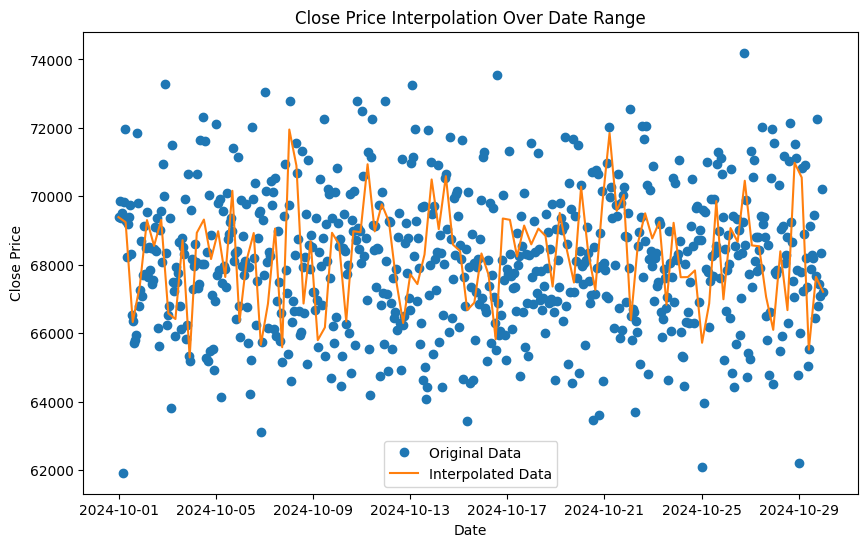

In [30]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Load data from CSV
file_path = r'C:\Users\ibrah\OneDrive\Desktop\Everyday\Synthetic_BTC_OHLC_ScientificFormat_Liquidations.CSV'
data = pd.read_csv(file_path)

# Combine Date and Time columns to create a datetime index if not already combined
if 'Datetime' not in data.columns:
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Verify that the column was created
print("Columns in data:", data.columns)

# Define date range
start_date = '2024-10-01'
end_date = '2024-10-30'

# Filter data based on the date range and create a copy to avoid SettingWithCopyWarning
filtered_data = data[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date)].copy()
print("Filtered Data:")
print(filtered_data.head())

# Interpolation example: interpolating Close Price
# Convert dates to numerical format for interpolation using .loc to avoid SettingWithCopyWarning
filtered_data.loc[:, 'Timestamp'] = filtered_data['Datetime'].map(pd.Timestamp.timestamp)

# Define the interpolation function based on existing data
x = filtered_data['Timestamp']
y = filtered_data['Close Price']

# Linear interpolation
interpolator = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Example: Interpolating close prices for new timestamps within the range
# Generate new timestamps within the same range to interpolate
new_timestamps = np.linspace(x.min(), x.max(), 100)  # 100 points between start and end

# Interpolate values for these new timestamps
interpolated_prices = interpolator(new_timestamps)

# Convert new timestamps back to datetime for display
new_datetimes = pd.to_datetime(new_timestamps, unit='s')

# Plot the original and interpolated data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Datetime'], filtered_data['Close Price'], 'o', label='Original Data')
plt.plot(new_datetimes, interpolated_prices, '-', label='Interpolated Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Interpolation Over Date Range')
plt.legend()
plt.show()


Columns in data: Index(['Date', 'Time', 'Open Price', 'High Price', 'Low Price', 'Close Price',
       'Long Liquidation', 'Short Liquidation', 'Market Cap', 'Datetime'],
      dtype='object')
Filtered Data:
        Date     Time   Open Price   High Price    Low Price  Close Price  \
0  10/1/2024  0:00:00  69758.77988  70484.37121  68993.63829  69393.34754   
1  10/1/2024  1:00:00  69270.84905  69791.81461  68839.24551  69853.98675   
2  10/1/2024  2:00:00  69085.22157  69386.57012  68693.49348  69354.48476   
3  10/1/2024  3:00:00  69431.87779  69864.95347  68913.57340  69501.14668   
4  10/1/2024  4:00:00  62010.77428  62334.86286  61300.08633  61924.83285   

  Long Liquidation Short Liquidation    Market Cap            Datetime  
0          43.917K          623.959K  1.360000e+12 2024-10-01 00:00:00  
1          94.755K          121.302K  1.310000e+12 2024-10-01 01:00:00  
2          10.250K           50.000K  1.330000e+12 2024-10-01 02:00:00  
3          12.755K           75.500K 

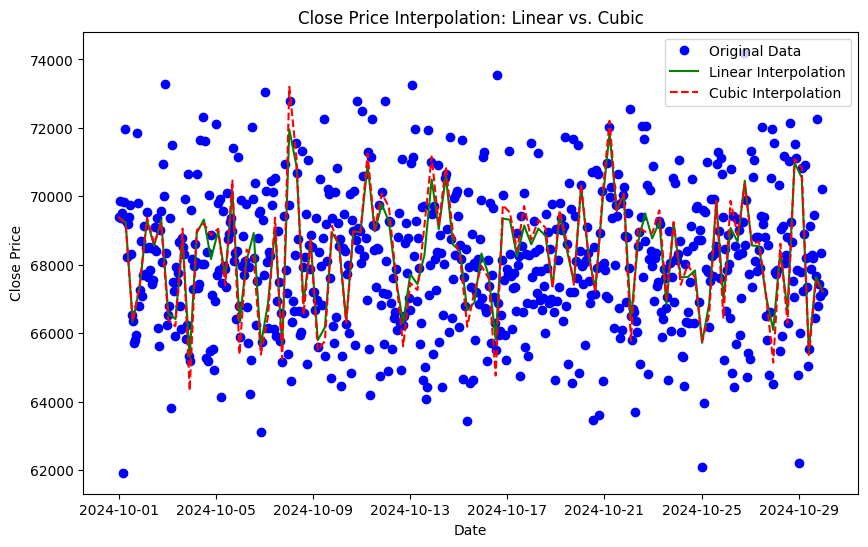

In [31]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Load data from CSV
file_path = r'C:\Users\ibrah\OneDrive\Desktop\Everyday\Synthetic_BTC_OHLC_ScientificFormat_Liquidations.CSV'
data = pd.read_csv(file_path)

# Combine Date and Time columns to create a datetime index if not already combined
if 'Datetime' not in data.columns:
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Verify that the column was created
print("Columns in data:", data.columns)

# Define date range
start_date = '2024-10-01'
end_date = '2024-10-30'

# Filter data based on the date range
filtered_data = data[(data['Datetime'] >= start_date) & (data['Datetime'] <= end_date)].copy()
print("Filtered Data:")
print(filtered_data.head())

# Interpolation example: interpolating Close Price
# Convert dates to numerical format for interpolation using .loc to avoid SettingWithCopyWarning
filtered_data.loc[:, 'Timestamp'] = filtered_data['Datetime'].map(pd.Timestamp.timestamp)

# Define the interpolation function based on existing data
x = filtered_data['Timestamp']
y = filtered_data['Close Price']

# Linear interpolation
linear_interpolator = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Cubic interpolation
cubic_interpolator = interp1d(x, y, kind='cubic', fill_value="extrapolate")

# Generate new timestamps within the same range to interpolate
new_timestamps = np.linspace(x.min(), x.max(), 100)  # 100 points between start and end

# Interpolate values for these new timestamps
linear_interpolated_prices = linear_interpolator(new_timestamps)
cubic_interpolated_prices = cubic_interpolator(new_timestamps)

# Convert new timestamps back to datetime for display
new_datetimes = pd.to_datetime(new_timestamps, unit='s')

# Plot the original data and both interpolated results with colors
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Datetime'], filtered_data['Close Price'], 'o', color='blue', label='Original Data')
plt.plot(new_datetimes, linear_interpolated_prices, '-', color='green', label='Linear Interpolation')
plt.plot(new_datetimes, cubic_interpolated_prices, '--', color='red', label='Cubic Interpolation')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Interpolation: Linear vs. Cubic')
plt.legend()
plt.show()


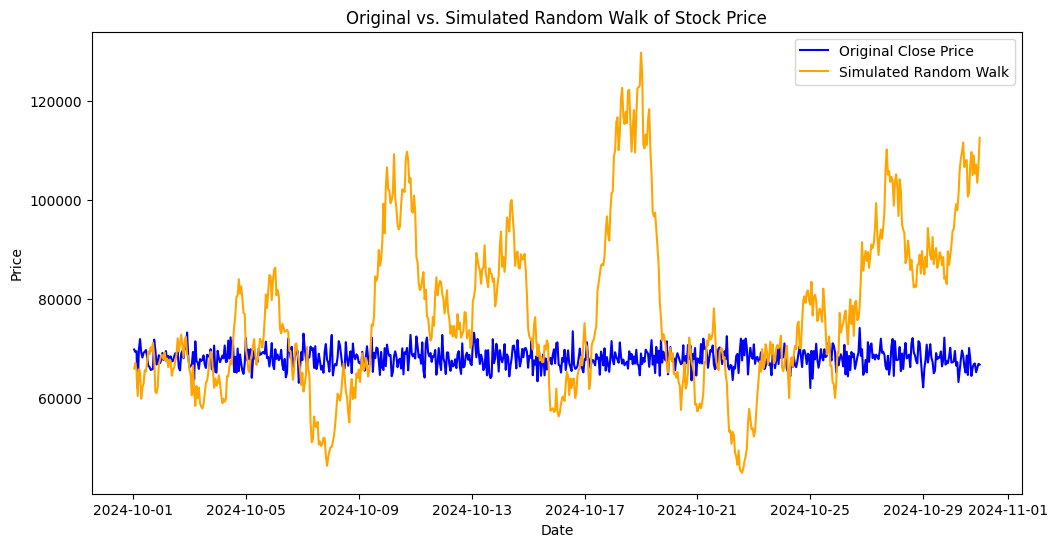

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
file_path = r'C:\Users\ibrah\OneDrive\Desktop\Everyday\Synthetic_BTC_OHLC_ScientificFormat_Liquidations.CSV'
data = pd.read_csv(file_path)

# Combine Date and Time columns to create a datetime index if not already combined
if 'Datetime' not in data.columns:
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Sort data by datetime to ensure chronological order
data = data.sort_values(by='Datetime').reset_index(drop=True)

# Set parameters based on historical data
initial_price = data['Close Price'].iloc[0]  # Start price based on the first available price
data['Return'] = data['Close Price'].pct_change()  # Calculate daily returns
volatility = data['Return'].std()  # Calculate standard deviation (volatility) of returns
mean_return = data['Return'].mean()  # Calculate mean return

# Remove NaN values from returns (first row will be NaN after pct_change)
data = data.dropna().reset_index(drop=True)

# Define function to simulate and plot the random walk
def simulate_random_walk():
    # Generate random daily returns using mean and volatility from historical data
    num_steps = len(data)  # Match the length of historical data
    daily_returns = np.random.normal(loc=mean_return, scale=volatility, size=num_steps)

    # Generate synthetic price series using random walk
    price_series = [initial_price]
    for return_rate in daily_returns:
        new_price = price_series[-1] * (1 + return_rate)
        price_series.append(new_price)

    # Convert to DataFrame for plotting
    simulated_data = pd.DataFrame({"Date": data['Datetime'], "Simulated Price": price_series[1:]})

    # Plot both the original and simulated random walk data
    plt.figure(figsize=(12, 6))
    plt.plot(data['Datetime'], data['Close Price'], label='Original Close Price', color='blue')
    plt.plot(simulated_data['Date'], simulated_data['Simulated Price'], label='Simulated Random Walk', color='orange')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Original vs. Simulated Random Walk of Stock Price")
    plt.legend()
    plt.show()

# Run the function to generate a random walk
simulate_random_walk()

